#### Import Modules

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [94]:
import datetime as dt
import calendar as cl
import plotly.express as pltx
import kaleido

In [95]:
import plotly.io as pio

pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

#### Reading Dataset

In [96]:
dataset = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
dataset.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [98]:
dataset.columns = ['State', 'Date', 'freq', 'EUR', 'EE', 'ELPR', 'Region', 'longitude', 'latitude']

In [99]:
dataset['State'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [100]:
dataset['Region'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [101]:
dataset['Date'] = pd.to_datetime(dataset['Date'], dayfirst=True)

In [102]:
dataset.columns

Index(['State', 'Date', 'freq', 'EUR', 'EE', 'ELPR', 'Region', 'longitude',
       'latitude'],
      dtype='object')

In [103]:
dataset.stats = dataset[['EUR', 'EE', 'ELPR']]
round(dataset.stats.describe(), 2)

C:\Users\HP\AppData\Local\Temp\ipykernel_5280\4220165107.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,EUR,EE,ELPR
count,267.00,267.00,267.00
mean,12.24,13962105.72,41.68
std,10.80,13366318.36,7.85
min,0.50,117542.00,16.77
25%,4.84,2838930.50,37.26
50%,9.65,9732417.00,40.39
75%,16.76,21878686.00,44.06
max,75.85,59433759.00,69.69


Text(0.5, 1.0, 'Unemployment Rate in India(Region Wise)')

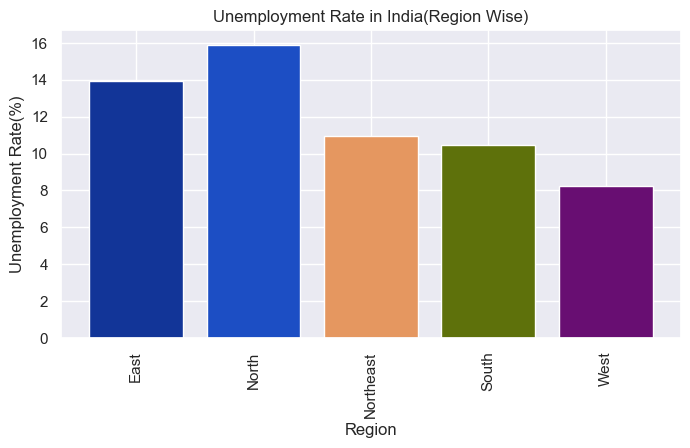

In [104]:
# Region wise grouping of the dataset
region_wise = round(dataset.groupby("Region").agg({"EUR": np.average, "EE": np.average, "ELPR": np.average}), 2)

region_wise.reset_index(inplace=True)
fig = plt.figure(figsize=(8,4))
plt.bar(region_wise['Region'],height=region_wise['EUR'],color=np.random.rand(5, 3))
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Unemployment Rate(%)')
plt.title('Unemployment Rate in India(Region Wise)')

##### Above Bar chart shows the Unemployement Rate in different Regions. It emplies that the **North region** have the highest Unemployment rate and **West region** have the lowest unemplolyment rate.

Text(0.5, 1.0, 'Unemployment Rate in India(State Wise)')

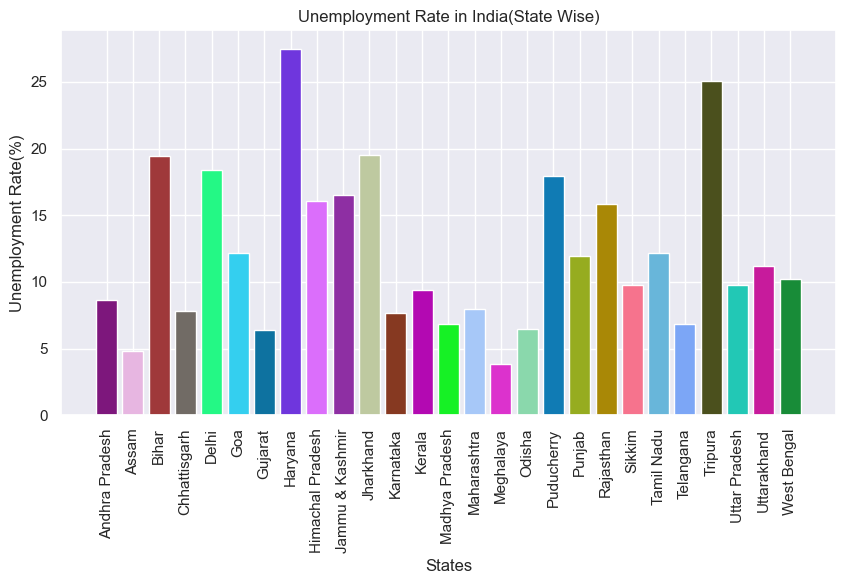

In [105]:
state_wise = round(dataset.groupby("State").agg({"EUR": np.average, "EE": np.average, "ELPR": np.average}), 2)
state_wise.reset_index(inplace=True)
fig= plt.figure(figsize=(10,5))
plt.bar(state_wise['State'],height=state_wise['EUR'],color=np.random.rand(27, 3))
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Unemployment Rate(%)')
plt.title('Unemployment Rate in India(State Wise)')

##### Above chart shows the state wise Unemployment rate. **Haryana** has the highest unemployment rate while **Meghalaya** has the lowest unemployment rate.

In [106]:
a = []
for i in dataset['Date']:
    a.append(i.month)
dataset['Month'] = a
dataset['Month_name'] =  dataset['Month'].apply(lambda x: cl.month_abbr[x])

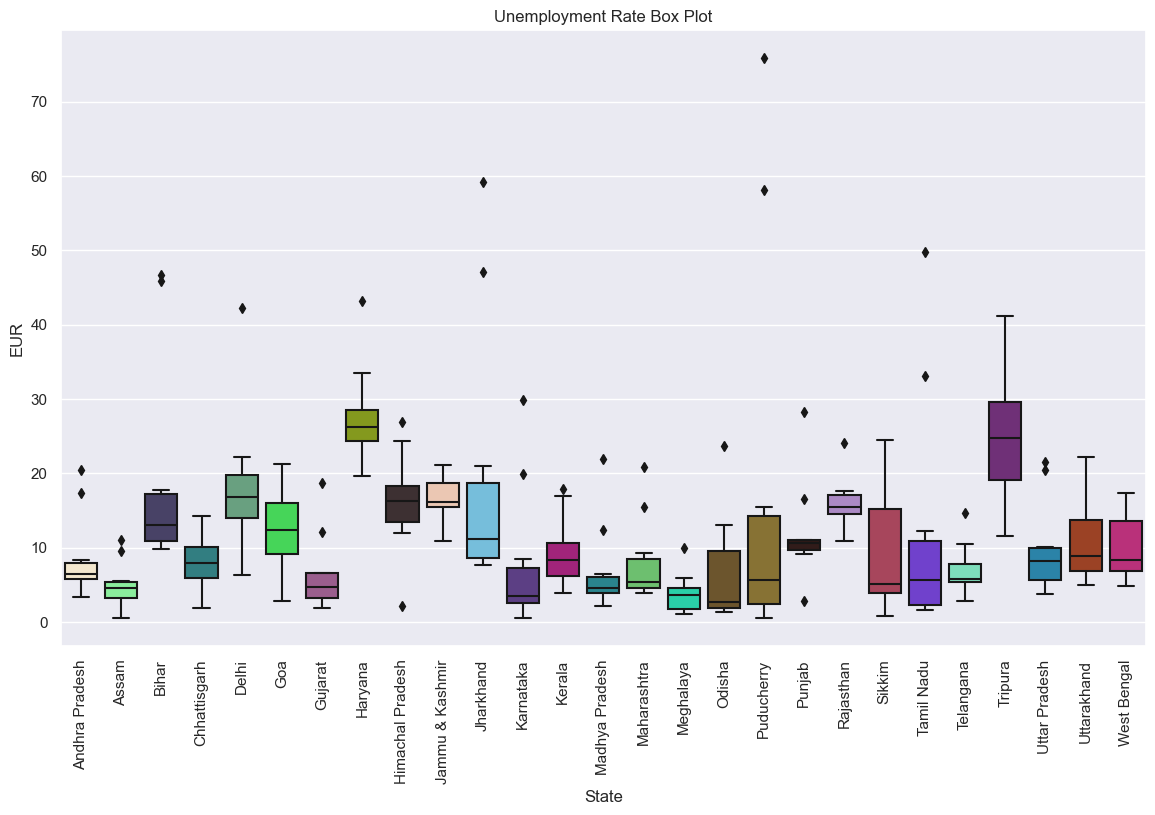

In [107]:
list = np.random.rand(27,3)
fig = sbn.boxplot(data=dataset, x= 'State', y= 'EUR', palette=list)
fig.set_xticklabels(labels=state_wise['State'], rotation=90)
fig.set_title('Unemployment Rate Box Plot')
sbn.set(rc={'figure.figsize':(14,8)})


##### The overall discription of the Unemployment rate(State wise).

<module 'matplotlib.pyplot' from 'c:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

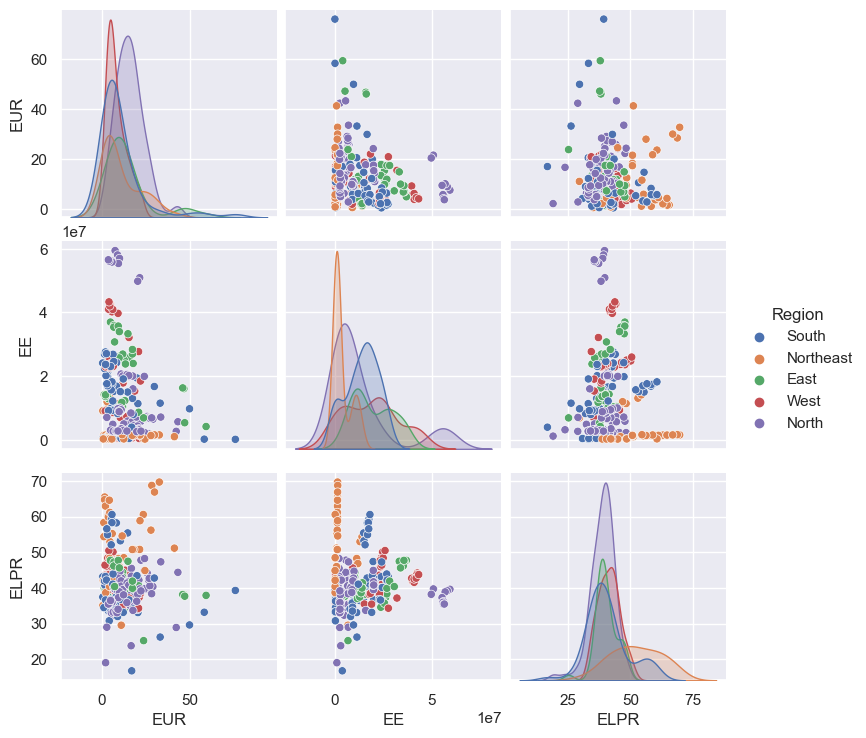

In [108]:

sbn.pairplot(dataset[['EUR', 'EE', 'ELPR', 'Region']], hue= "Region")
plt

### Now I look for the period of before lockdown and after lockdown and here the percentage rate change of the unemployment rate in different states.

In [109]:
lockdown = dataset[(dataset['Month']>=4) & (dataset['Month']<=7)]
before_lockdown =  dataset[(dataset['Month']>=1) & (dataset['Month']<4)]
# before_lockdown = pd.concat([dataset, lockdown]).drop_duplicates(keep=False)

state_wise_lock = lockdown.groupby("State")['EUR'].mean().reset_index()

state_wise_before_lock = before_lockdown.groupby("State")['EUR'].mean().reset_index()


In [110]:
state_wise_lock['Unemployment rate before lockdown'] = state_wise_before_lock['EUR']
state_wise_lock.columns  = ['State', 'Unemployment rate after lockdown', 'Unemployment rate before lockdown']               

In [111]:
state_wise_lock['Percentage Change'] = (state_wise_lock['Unemployment rate after lockdown'] - state_wise_lock['Unemployment rate before lockdown'])
state_wise_lock = round(state_wise_lock, 2)
state_wise_lock.head()
               

,State,Unemployment rate after lockdown,Unemployment rate before lockdown,Percentage Change
0,Andhra Pradesh,12.40,5.70,6.70
1,Assam,6.24,4.61,1.63
2,Bihar,30.80,12.11,18.69
3,Chhattisgarh,9.60,8.52,1.08
4,Delhi,24.36,18.04,6.32


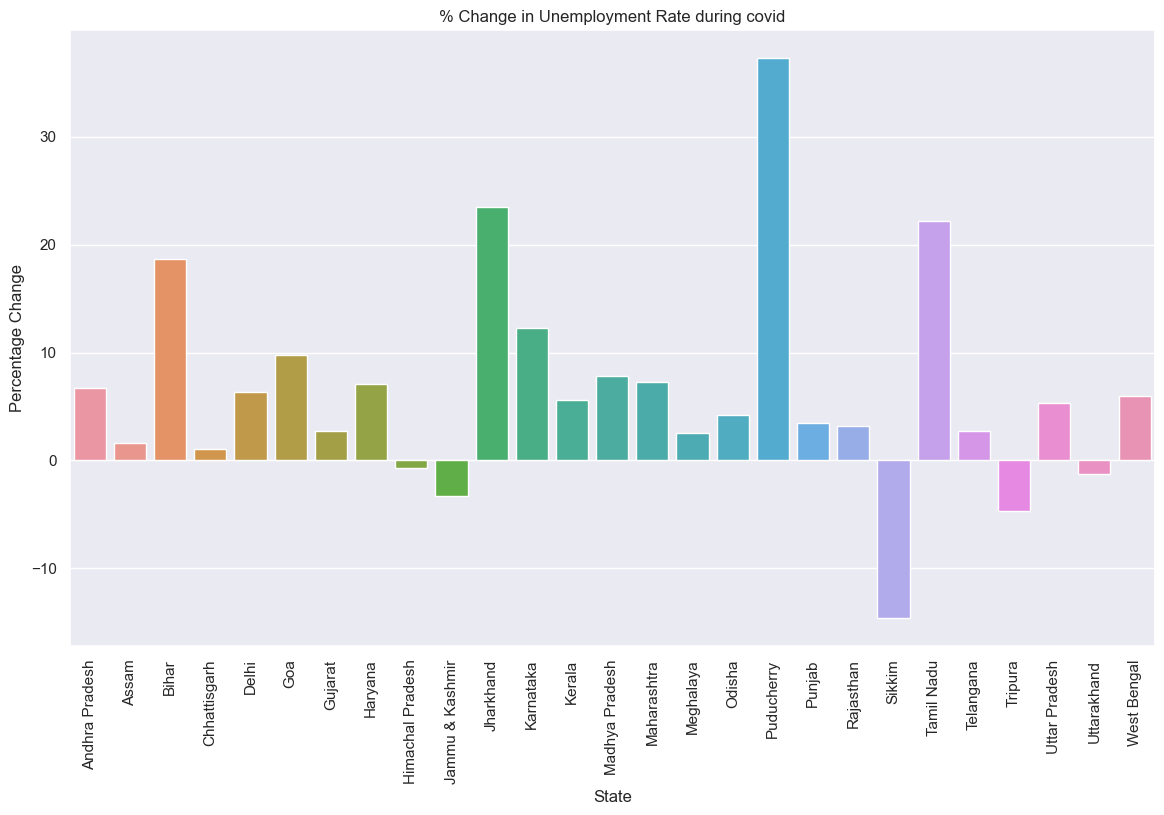

In [112]:
# fig = pltx.bar(state_wise_lock, x='State',y='Percentage Change',color='Percentage Change',
#             title='percentage Rate change in Unemployment in each state after lockdown')
# fig.show(renderer='vscode')
fig = sbn.barplot(data=state_wise_lock, x='State', y='Percentage Change')
fig.set_xticklabels(labels=state_wise_lock['State'], rotation=90)
fig.set_title('% Change in Unemployment Rate during covid')
sbn.set(rc={'figure.figsize':(14,8)})


#### The conclusion of above chart is that, after the lockdown the unemployment rate was incresed in almost every state **(except Sikkim, J & K, Tripura, Uttarakhand and Himachal Pradesh)**.
#### The highest increment in Unemployment rate was in **Puducherry** followed by **Jharkhand** and **Tamil Nadu**.